Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report


Load Data

In [2]:
data = pd.read_csv('Downloads/Train Health Insurance Cross Sell Prediction.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [3]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381107.000000,381107.000000,381107.000000,381107.000000,381107.000000,381107.000000,381107.000000,381107.000000,381107.000000
mean,190554.000000,38.822488,0.997869,26.388833,0.458213,30564.323287,112.034489,154.347391,0.122564
std,110016.258857,15.511575,0.046110,13.229907,0.498251,17213.175589,54.203954,83.671315,0.327937
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95277.500000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190554.000000,36.000000,1.000000,28.000000,0.000000,31668.000000,133.000000,154.000000,0.000000
75%,285830.500000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381107.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381107 entries, 0 to 381106
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381107 non-null  int64 
 1   Gender                381107 non-null  object
 2   Age                   381107 non-null  int64 
 3   Driving_License       381107 non-null  int64 
 4   Region_Code           381107 non-null  int64 
 5   Previously_Insured    381107 non-null  int64 
 6   Vehicle_Age           381107 non-null  object
 7   Vehicle_Damage        381107 non-null  object
 8   Annual_Premium        381107 non-null  int64 
 9   Policy_Sales_Channel  381107 non-null  int64 
 10  Vintage               381107 non-null  int64 
 11  Response              381107 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


Checking Null Values

In [6]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Data Preprocessing

In [7]:
# Dataset Describe
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381107,381107,381107
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206088,200315,192412


In [8]:
data.nunique()

id                      381107
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [9]:
data_desc = []
for column in data.columns:
  data_desc.append([column,
                  data[column].dtypes,
                  data[column].isnull().sum(),
                  round(data[column].isnull().sum()/len(data)*100, 2),
                  data[column].nunique(),
                  data[column].unique()])

## storing all the information in a single table just to keep it neat 
column_desc = pd.DataFrame(data_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.0,381107,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3..."
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,int64,0,0.0,53,"[28, 3, 11, 41, 33, 6, 35, 50, 15, 45, 8, 36, ..."
5,Previously_Insured,int64,0,0.0,2,"[0, 1]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,int64,0,0.0,48838,"[40454, 33536, 38294, 28619, 27496, 2630, 2336..."
9,Policy_Sales_Channel,int64,0,0.0,155,"[26, 152, 160, 124, 14, 13, 30, 156, 163, 157,..."


In [10]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
     

There are 3 categorical variables


In [11]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 9 numerical variables


In [12]:
# Creating Separate Dataframe for numerical features
data_int = data[['Age','Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response']]  
     

In [13]:
data['Response'].value_counts()

Response
0    334397
1     46710
Name: count, dtype: int64

In [14]:
# No. of Male and females in Gender feature
data['Gender'].value_counts()

Gender
Male      206088
Female    175019
Name: count, dtype: int64

In [15]:
# Checking Driving_License feature
data_drive = data['Driving_License'].value_counts()
data_drive

Driving_License
1    380295
0       812
Name: count, dtype: int64

In [16]:
# Making copy of dataset df using copy()
# Dividing age in three sections and making Age_Group from them.
data1 = data.copy()
data1['Age_Group'] = data1['Age'].apply(lambda x:'Young_Age' if x >= 20 and x <=40 else 'Middle_Age' if x > 40 and x <= 60 else 'Old_Age')
     

In [17]:
# Checking Values of Policy Sales Channel
data['Policy_Sales_Channel'].value_counts().head(15)

Policy_Sales_Channel
152    134784
26      79699
124     73994
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
Name: count, dtype: int64

In [18]:
# Percentage of Policy Sales Channel
pert = round(data['Policy_Sales_Channel'].value_counts().head().sum()/len(data)*100, 2)
pert

84.21

In [19]:
# Checking Vehicle_Age 
data['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200315
< 1 Year     164786
> 2 Years     16006
Name: count, dtype: int64

In [20]:
# for checking outliers by using boxplot and droping object features
data_box = data.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

 Data Vizualization

In [21]:
# # Chart - 1 visualization code
# #Plot the count of the target variable
# sns.countplot(data['Response'])
# plt.title('Not-Interested vs Interested') #title for the countplot
# plt.show()

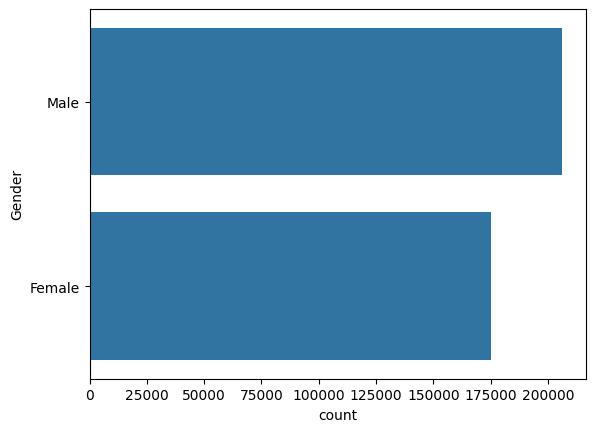

In [22]:
# Visualization code
sns.countplot(data['Gender'])
plt.show()
     

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\3649935754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Vehicle_Age'], palette = 'winter')


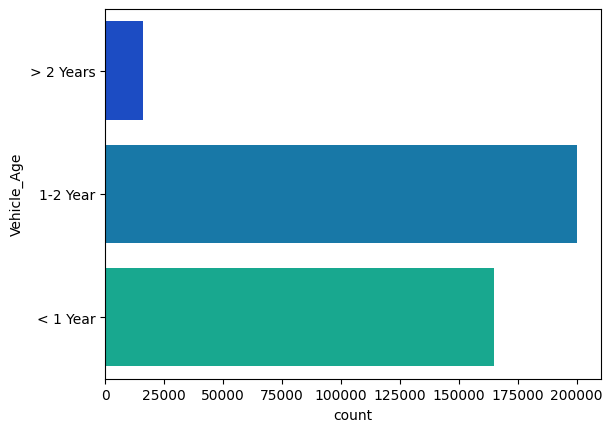

In [23]:
sns.countplot(data['Vehicle_Age'], palette = 'winter')
plt.show()

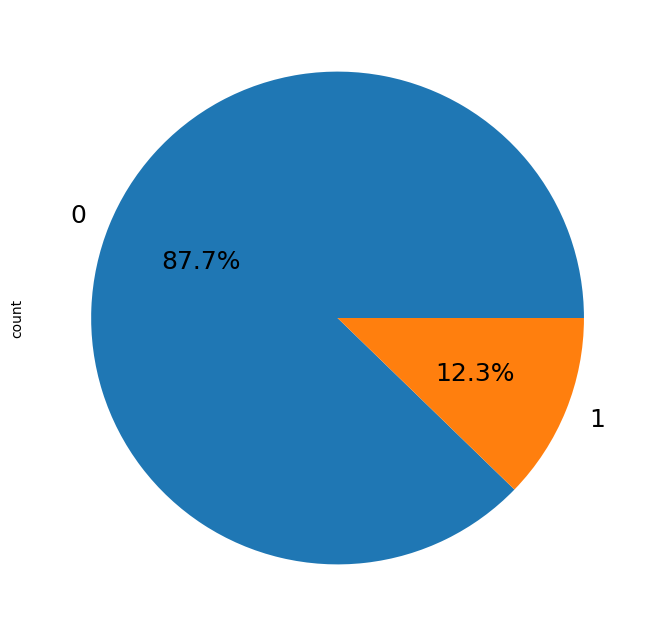

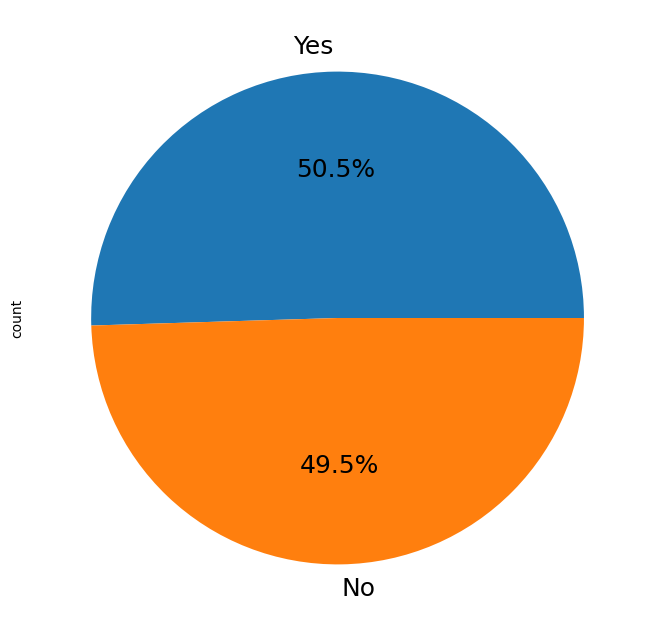

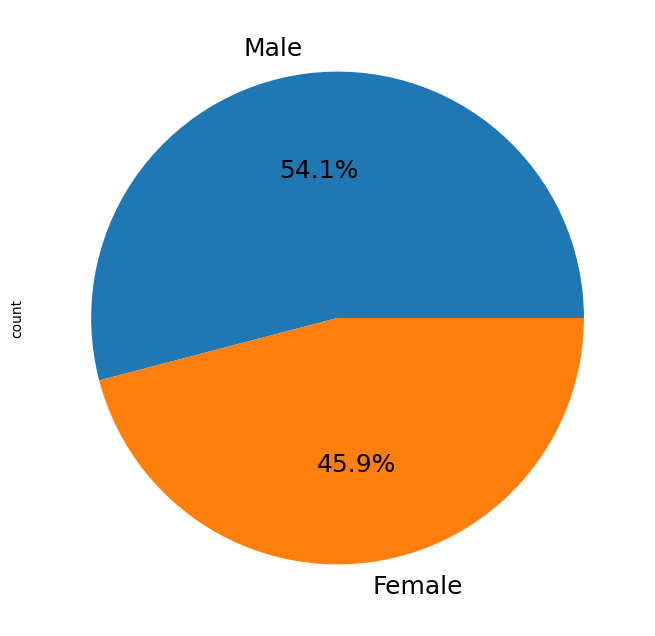

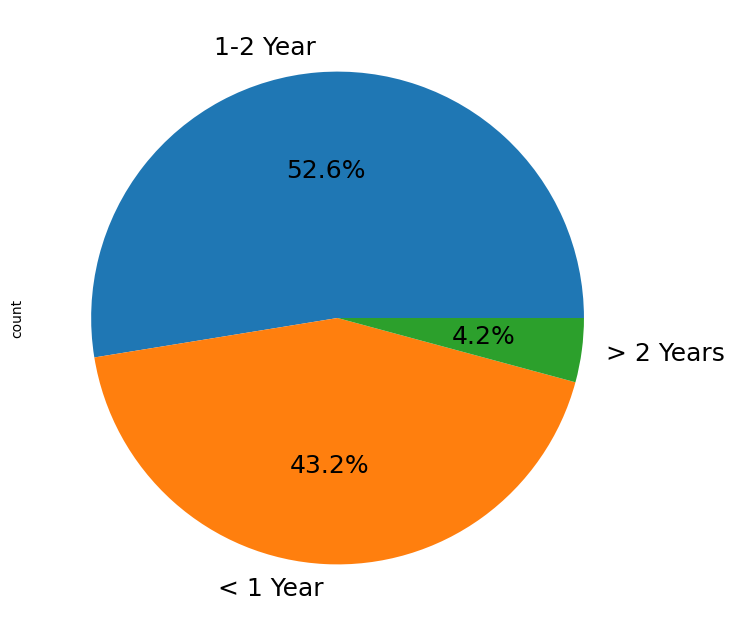

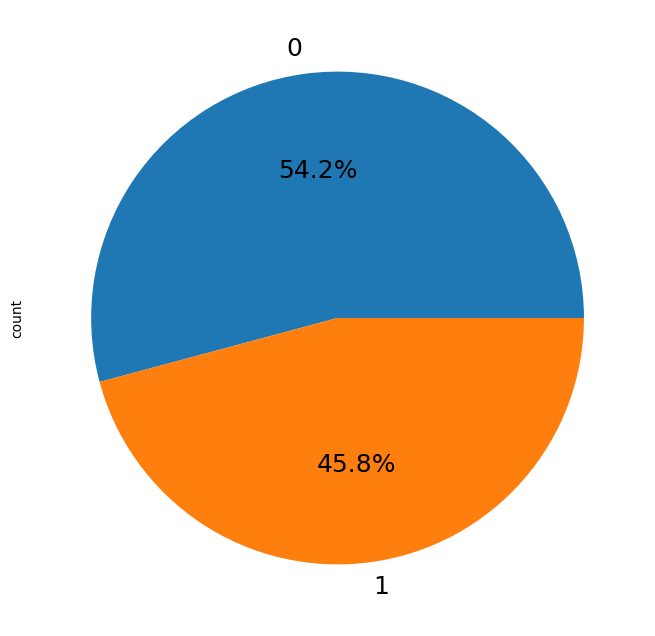

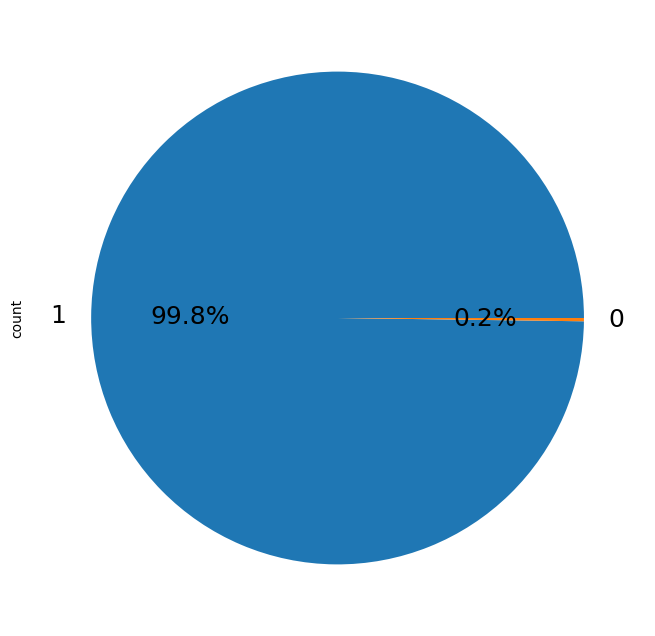

In [24]:
# Chart - 2 visualization code
# percentage of features
data_box = data[['Response', 'Vehicle_Damage', 'Gender','Vehicle_Age','Previously_Insured','Driving_License']]

for column in data_box :
    percent = data[column].value_counts()
    percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 15})
    plt.show()

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\1008813386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age']);


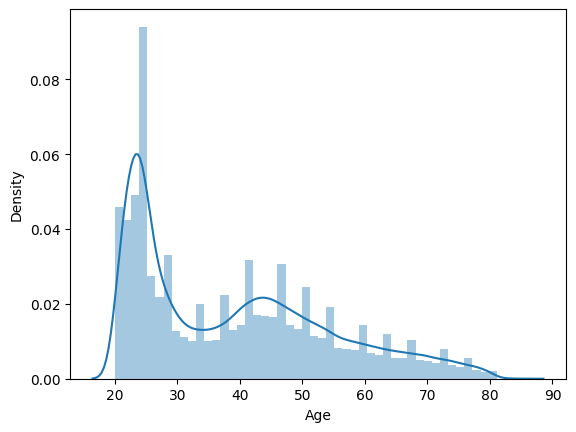

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\1008813386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Response']);


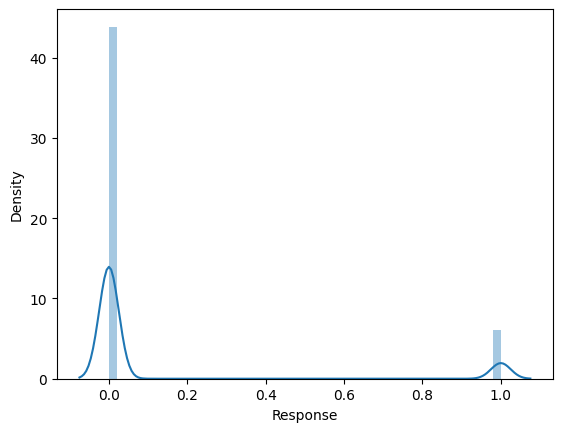

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\1008813386.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual_Premium']);


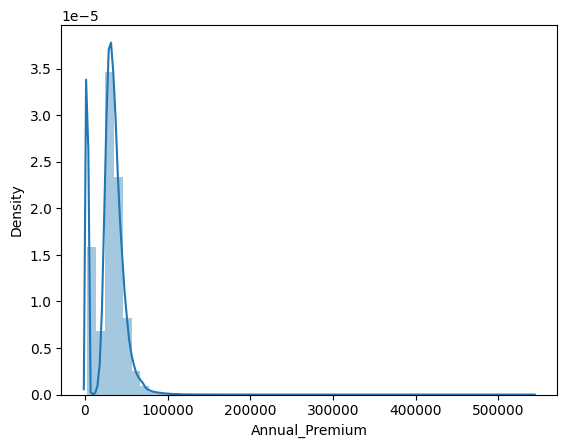

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\1008813386.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Region_Code']);


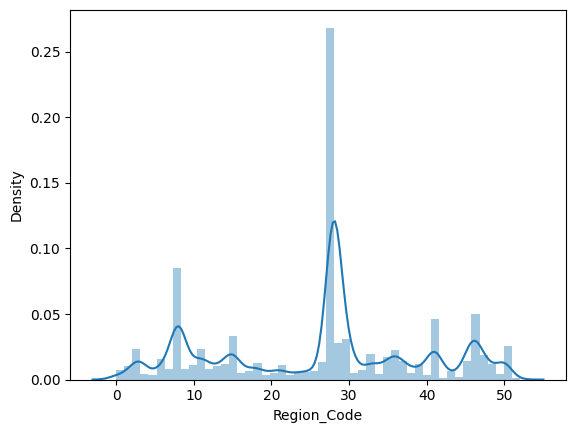

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\1008813386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Policy_Sales_Channel']);


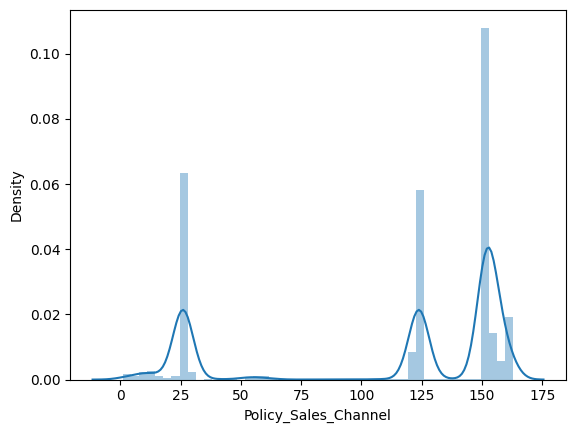

C:\Users\hepsi\AppData\Local\Temp\ipykernel_23928\1008813386.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Vintage']);


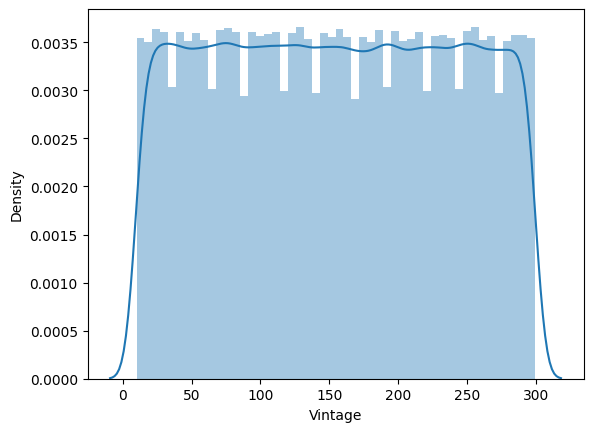

In [25]:
# Chart - 3 visualization code
# Displot of datasets 
sns.distplot(data['Age']);
plt.show()
sns.distplot(data['Response']);
plt.show()
sns.distplot(data['Annual_Premium']);
plt.show()
sns.distplot(data['Region_Code']);
plt.show()
sns.distplot(data['Policy_Sales_Channel']);
plt.show()
sns.distplot(data['Vintage']);
plt.show()
     

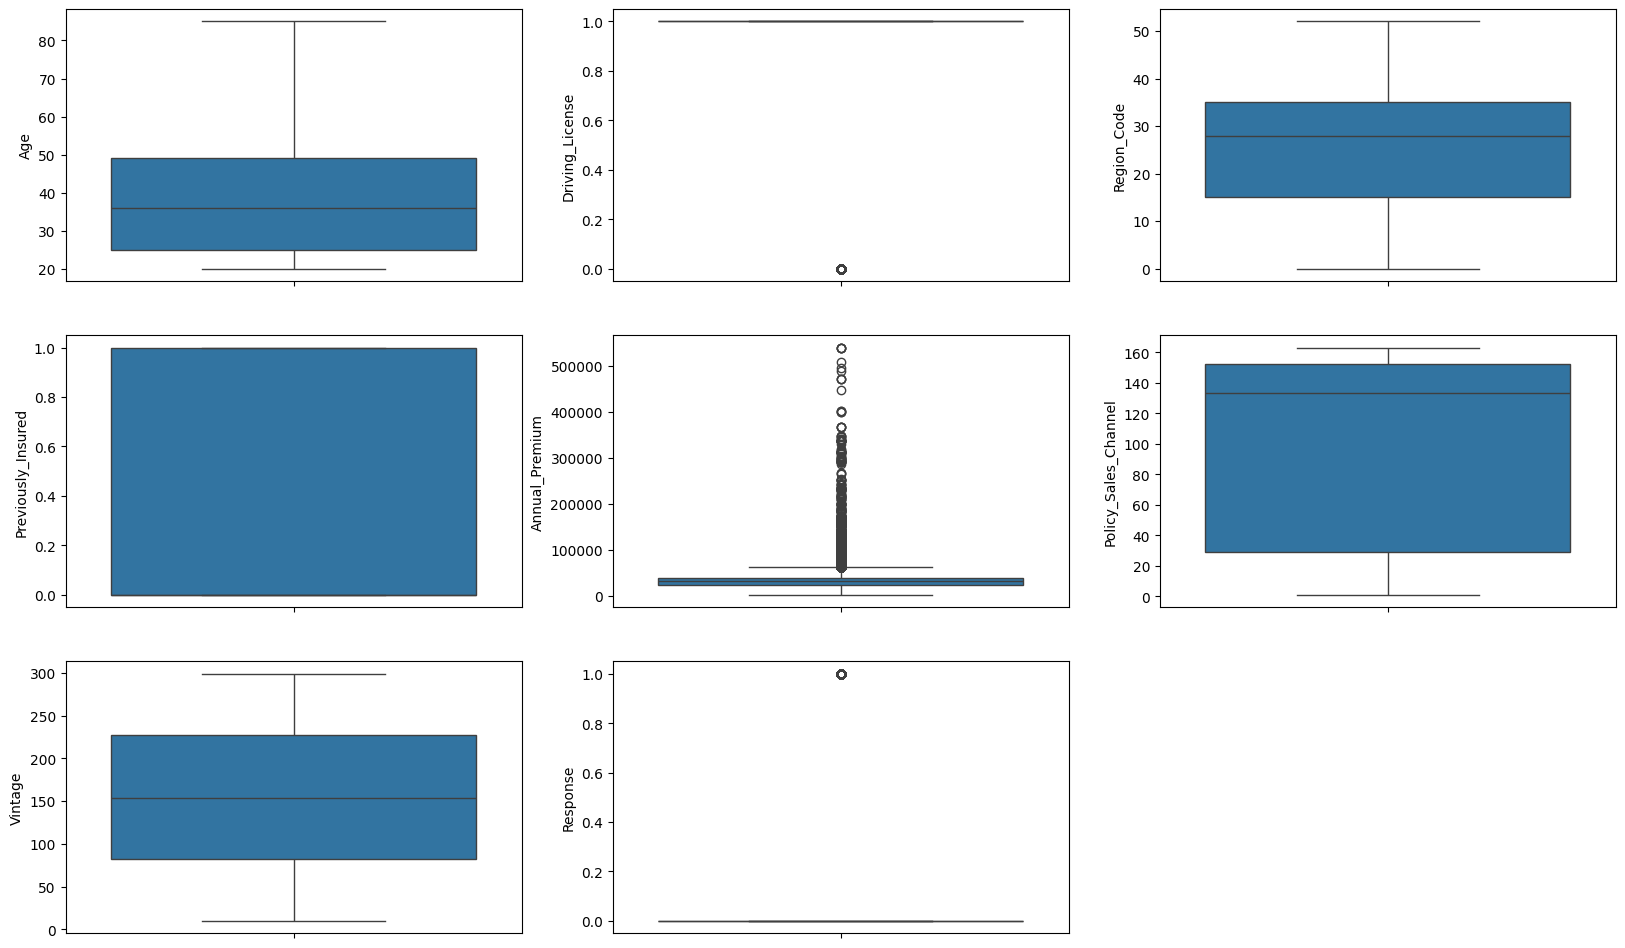

In [26]:
# Chart - 4 visualization code
# checking outliers by using boxplot and droping object features
data_box = data.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

plt.figure(figsize = (20, 12))
n = 1      
for column in data_box :
    plt.subplot(3,3,n)
    sns.boxplot(data[column])
    n += 1

In [27]:
# Chart - 5 visualization code
plt.figure(figsize = (15, 8))
sns.countplot(data['Vehicle_Age'], hue = data1['Response'], palette = 'coolwarm')
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1500x800 with 0 Axes>

In [ ]:
# visualization code
plt.figure(figsize = (15, 8))
sns.countplot(data['Vehicle_Age'], hue = data1['Previously_Insured'])
plt.show()

In [ ]:

# Chart - 6 visualization code
sns.countplot(x = data1['Age_Group'],data = data1)
plt.show()

In [ ]:
# Chart - 6 visualization code
sns.countplot(x = 'Age_Group', data = data1, hue='Response')
plt.show()

In [28]:
# Chart - 7 visualization code
plt.figure(figsize = (15, 8))
sns.countplot(data['Vehicle_Damage'], hue = data['Response'])
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1500x800 with 0 Axes>

In [29]:
plt.figure(figsize = (15, 8))
sns.countplot(data['Vehicle_Damage'], hue = data['Previously_Insured'])
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1500x800 with 0 Axes>

In [30]:
plt.figure(figsize = (18, 8))
sns.countplot(data['Vehicle_Age'], hue = data['Vehicle_Damage'])
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1800x800 with 0 Axes>

In [31]:
sns.countplot(data['Driving_License'],hue=data['Response'])
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

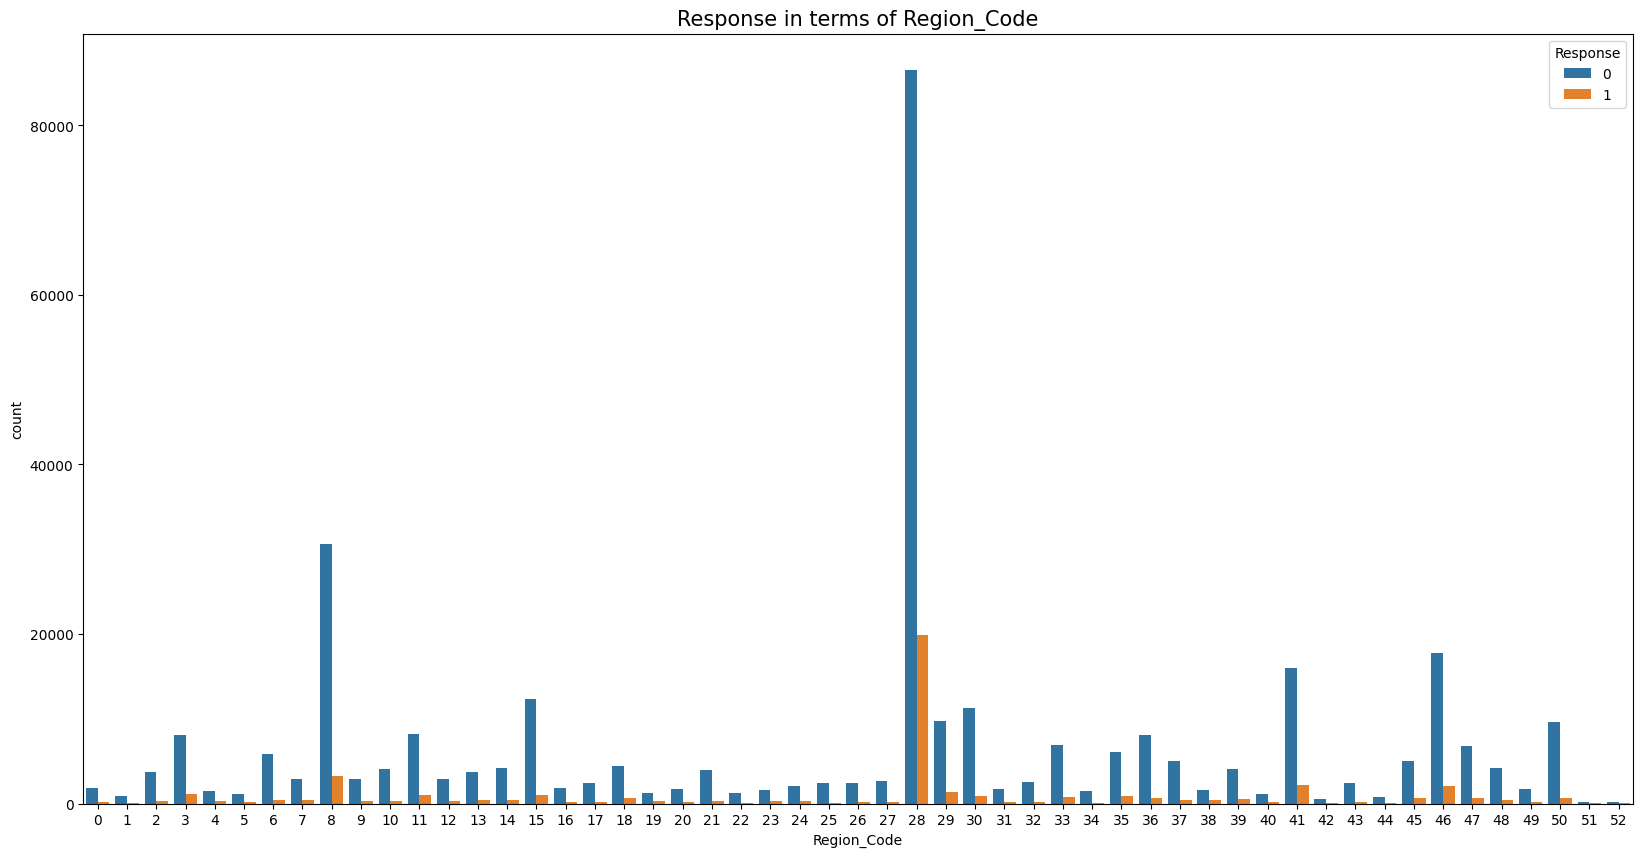

In [32]:
# Chart - 8 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='Region_Code', hue='Response', data=data)
plt.title('Response in terms of Region_Code', fontsize=15)
plt.show()

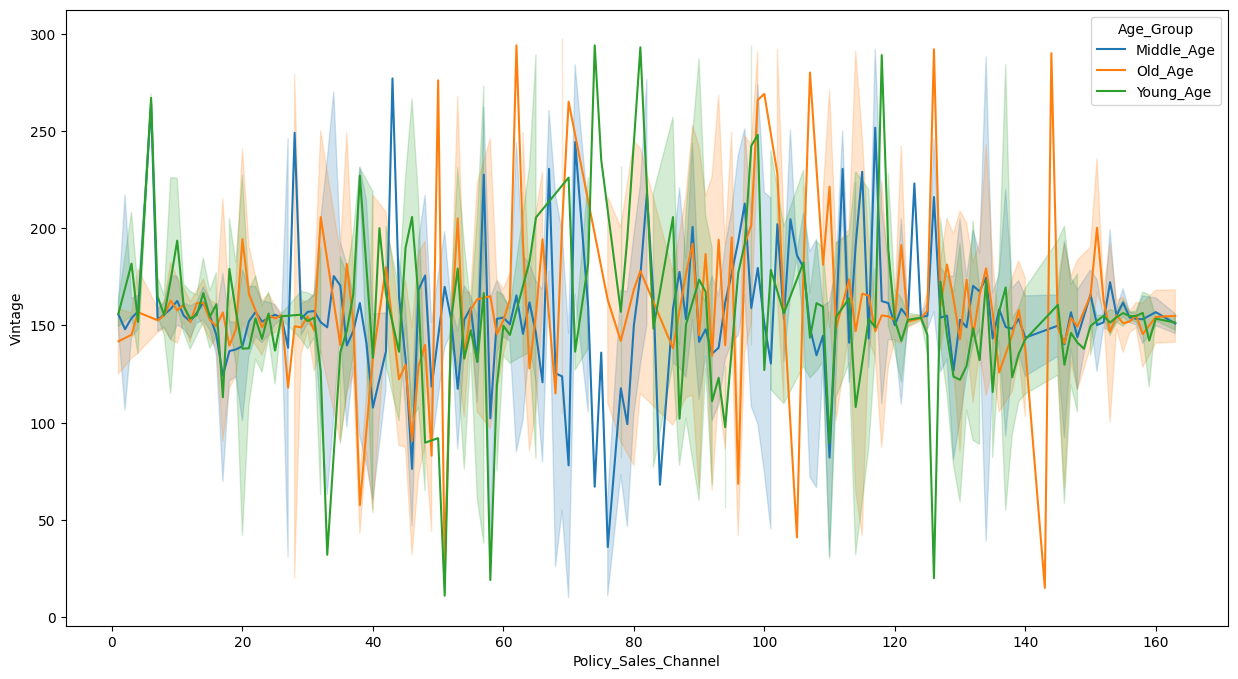

In [33]:
# Chart - 9 visualization code
# Scaterplots
plt.figure(figsize=(15,8))
sns.lineplot(data=data1,x='Policy_Sales_Channel',y='Vintage',hue ='Age_Group')
plt.show()

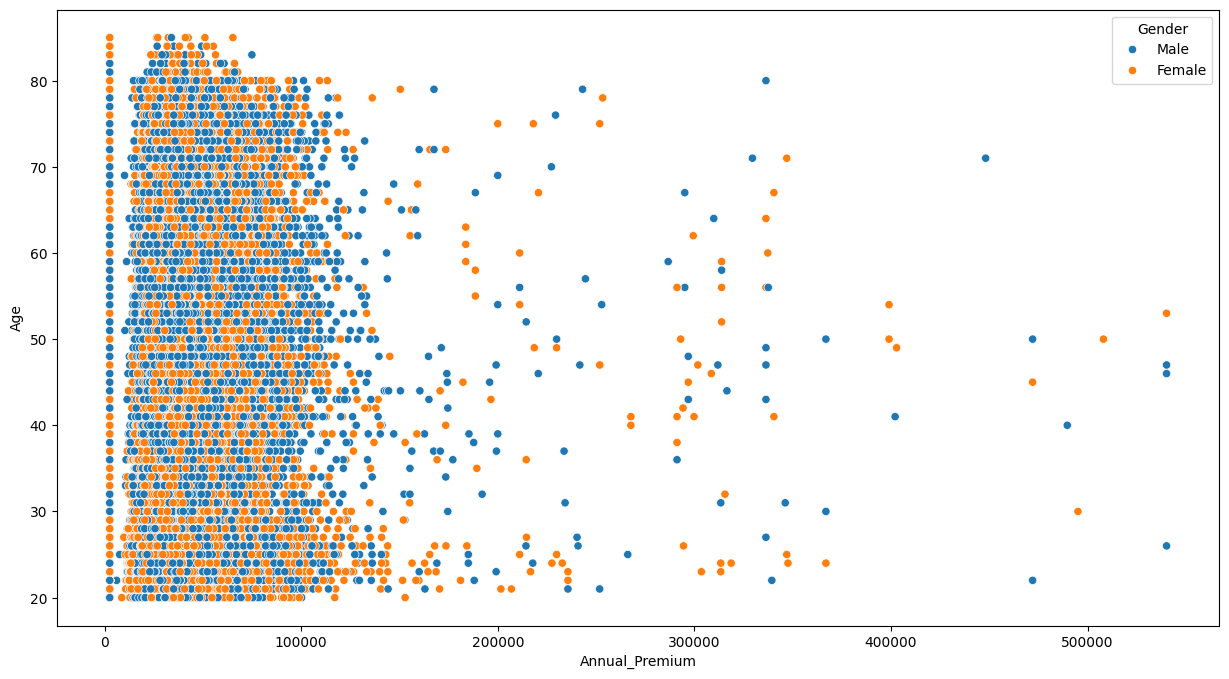

In [34]:
# Chart - 10 visualization code
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='Annual_Premium',y='Age',hue='Gender')
plt.show()
     

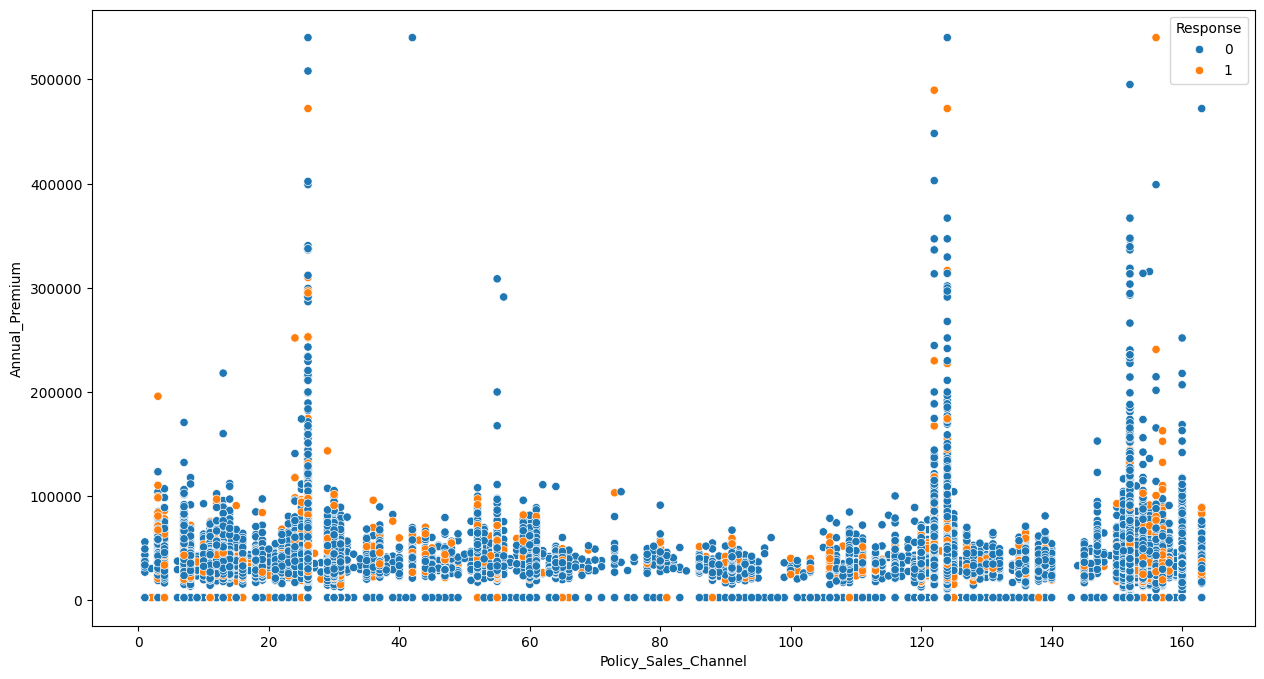

In [35]:
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,y='Annual_Premium',x='Policy_Sales_Channel',hue='Response')
plt.show()
     

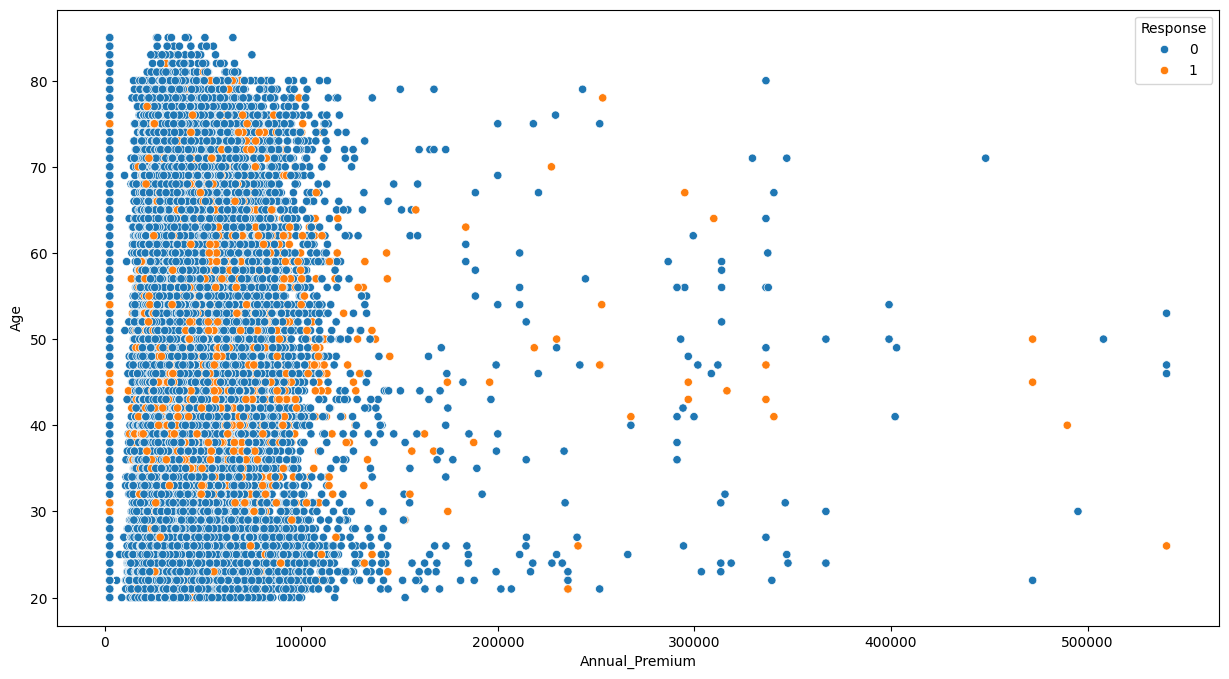

In [36]:
# Scaterplots
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='Annual_Premium',y='Age',hue='Response')
plt.show()

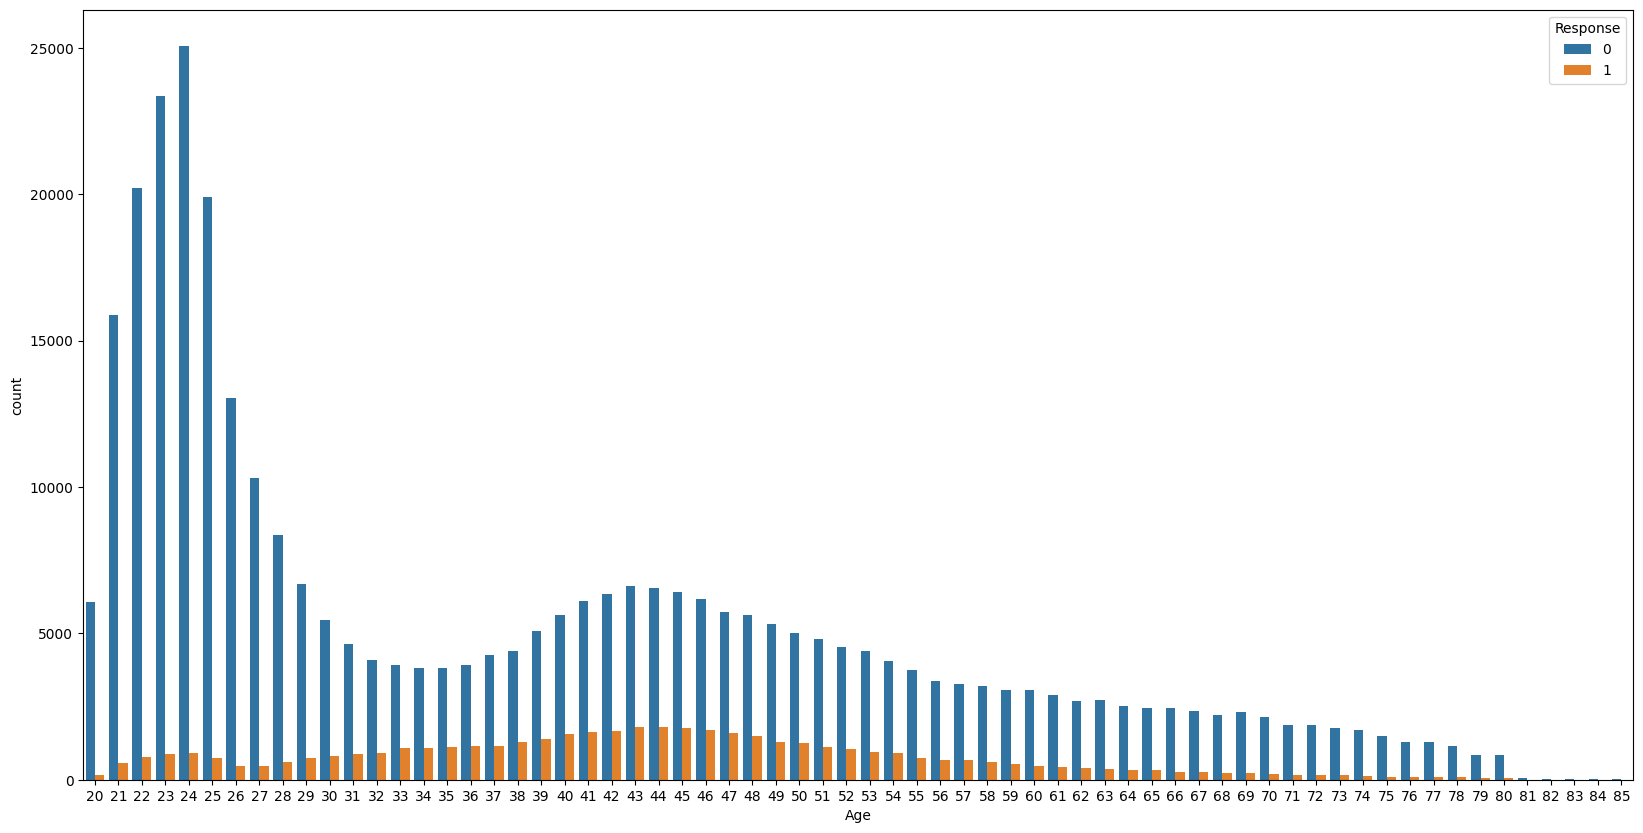

In [37]:
# Chart - 11 visualization code
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)
plt.show()

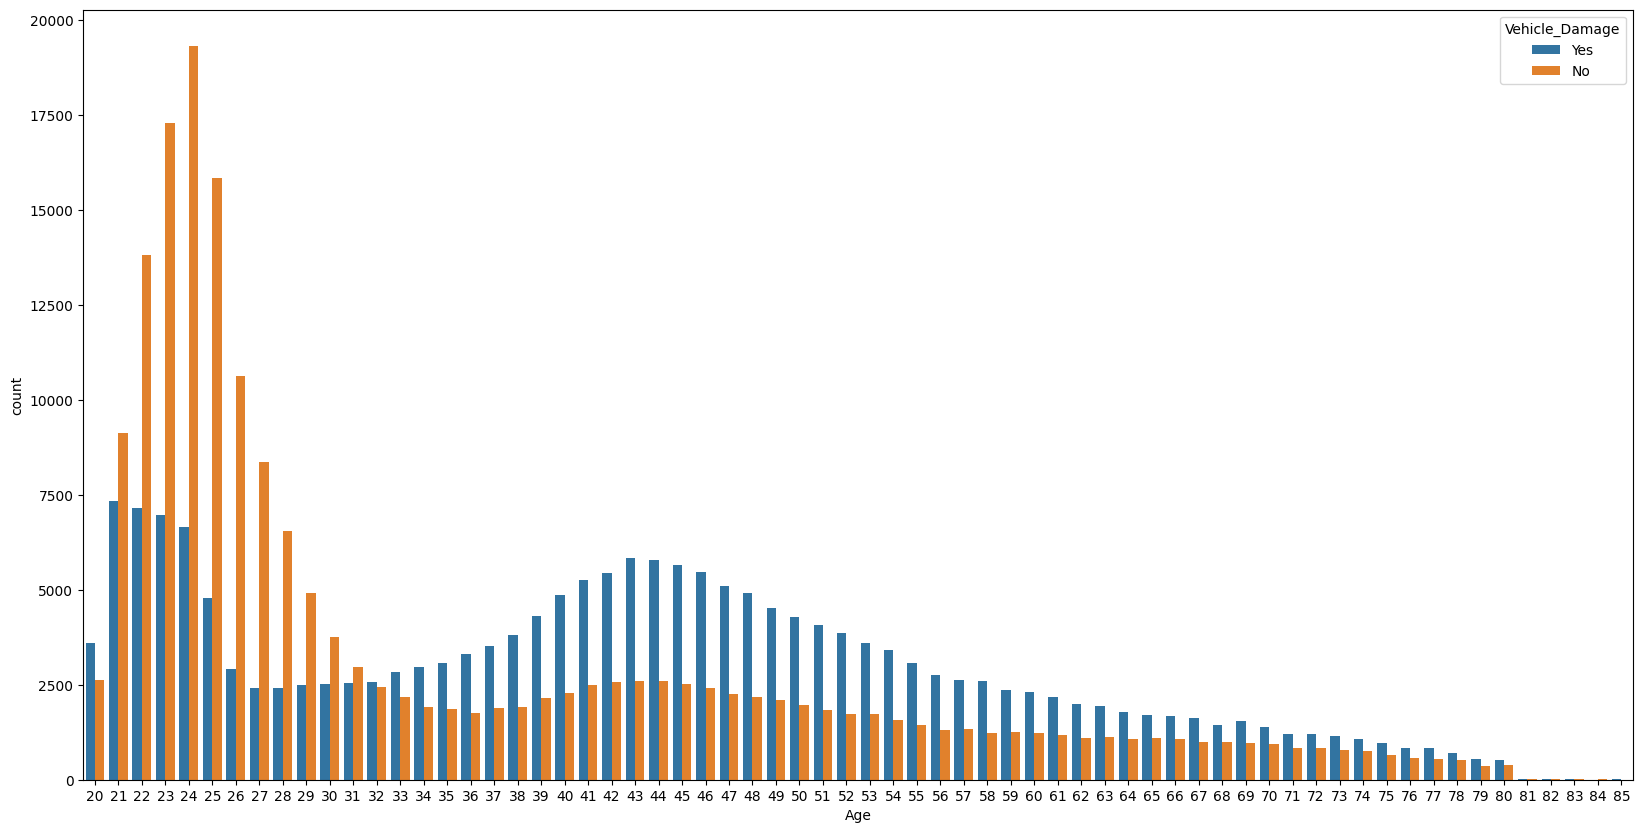

In [38]:
# visualization code
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Vehicle_Damage',data=data)
plt.show()

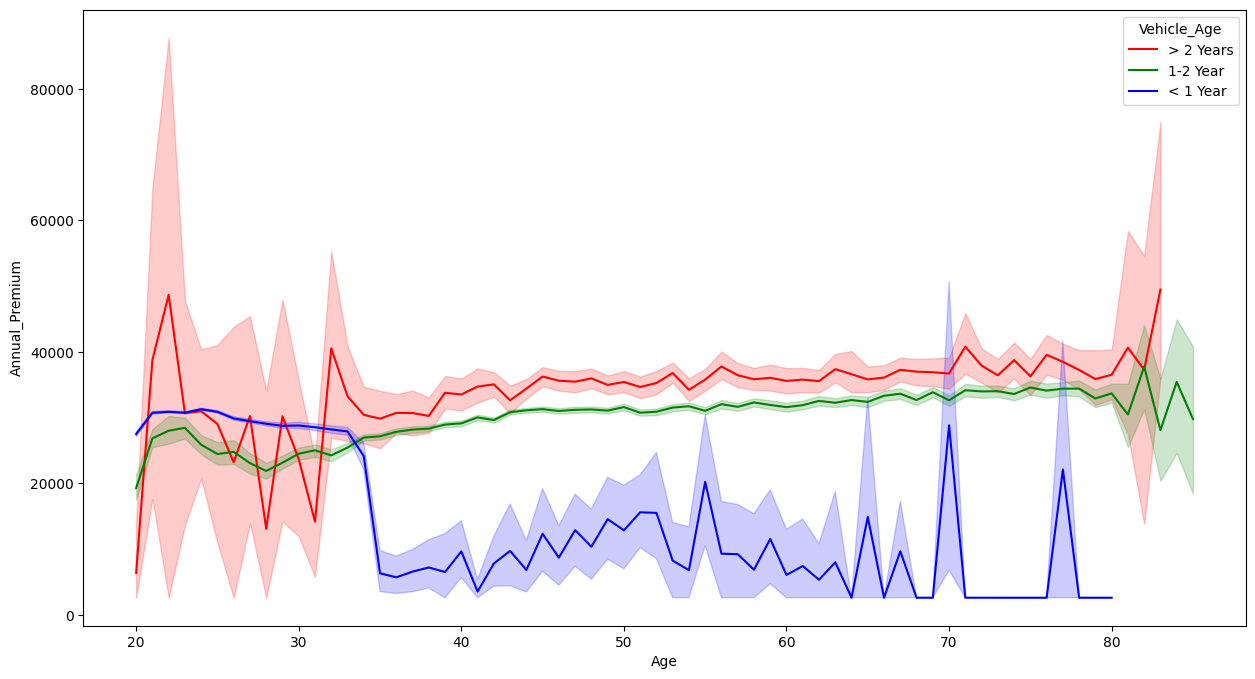

In [39]:
# Chart - 12 visualization code
plt.figure(figsize=(15,8))
sns.lineplot(data = data,x ='Age', y='Annual_Premium', hue='Vehicle_Age', palette=['r', 'g', 'b'])
plt.show()

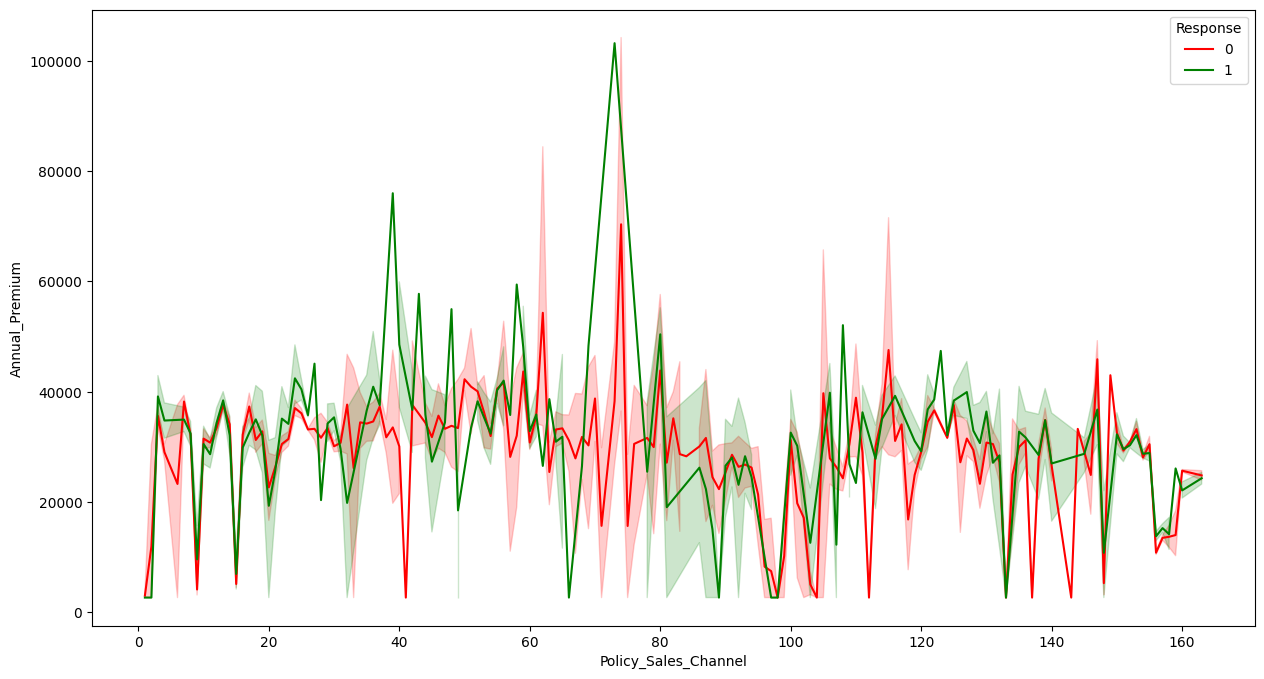

In [40]:
plt.figure(figsize=(15,8))
sns.lineplot(data = data,x ='Policy_Sales_Channel', y='Annual_Premium', hue='Response', palette=['r', 'g'])
plt.show()

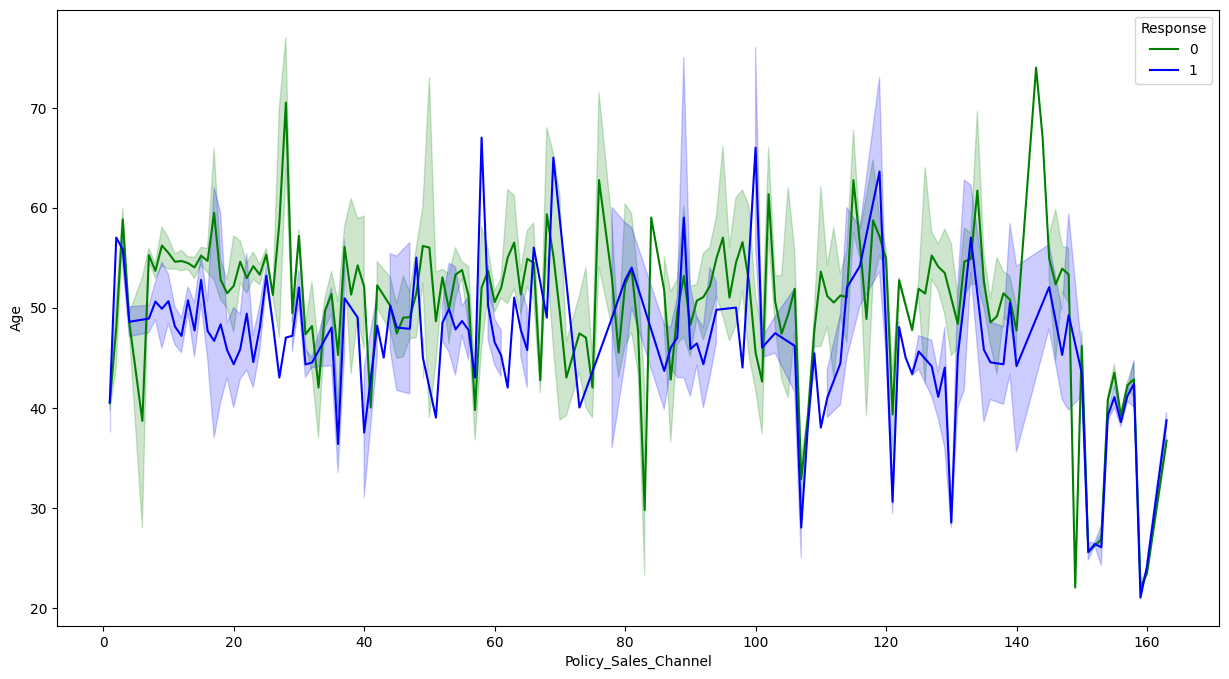

In [41]:
# Chart - 13 visualization code
plt.figure(figsize=(15,8))
sns.lineplot(data = data,y ='Age', x='Policy_Sales_Channel', hue='Response', palette=['g', 'b'])
plt.show()

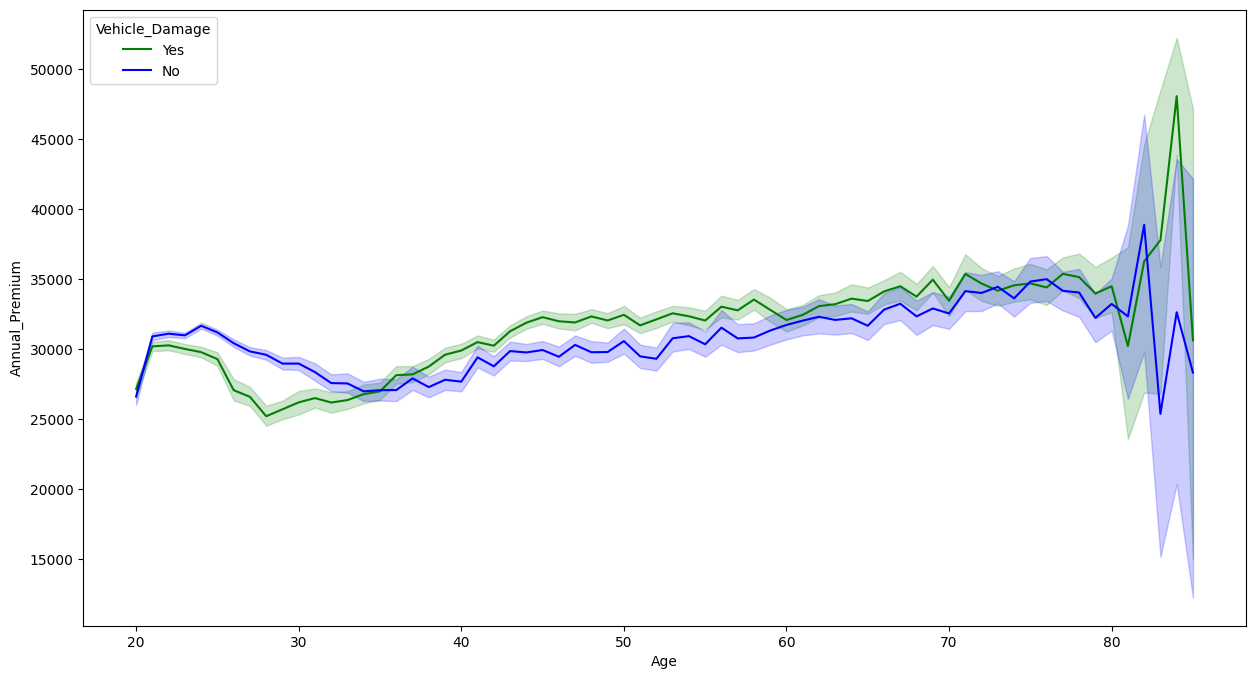

In [42]:
plt.figure(figsize=(15,8))
sns.lineplot(data = data,x ='Age', y='Annual_Premium', hue='Vehicle_Damage', palette=['g', 'b'])
plt.show()

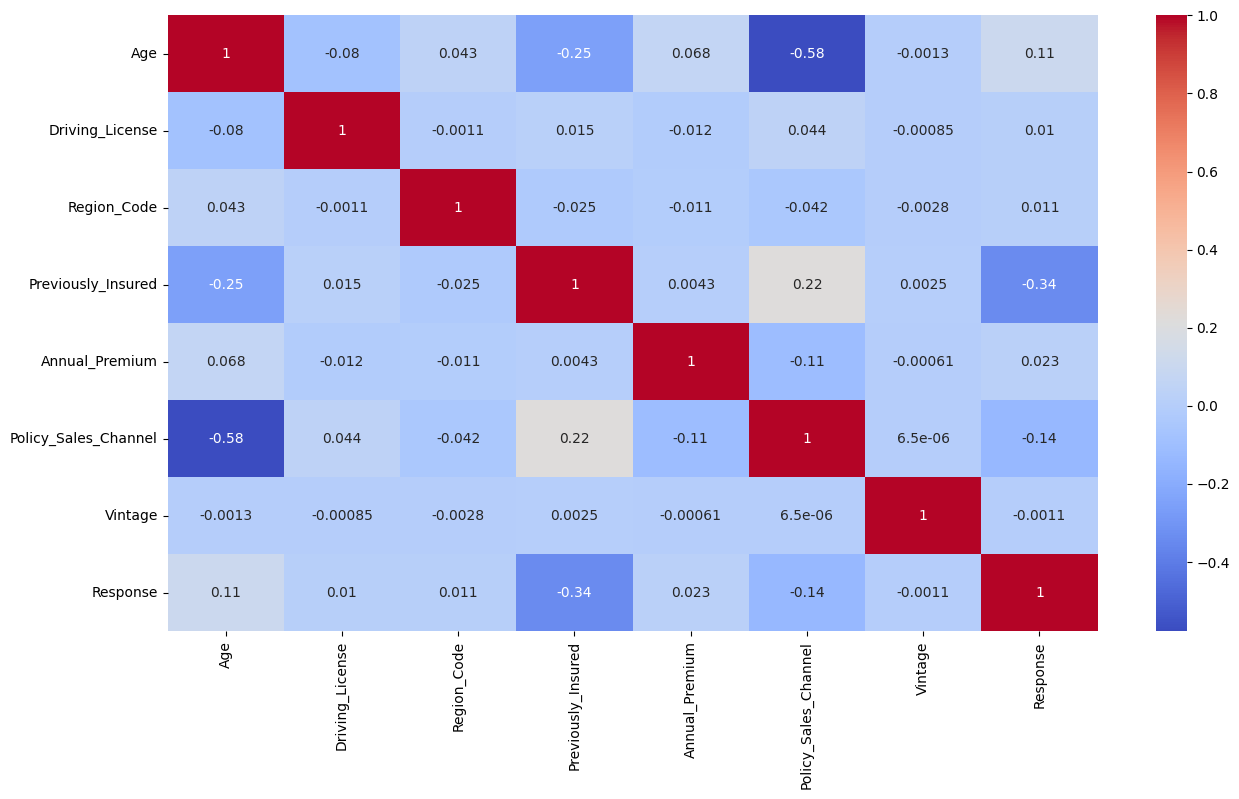

In [43]:
# Correlation Heatmap visualization code
corr_data = data_int.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_data,cmap='coolwarm',annot=True)
plt.show()

In [44]:
data_pair = data[['Gender','Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage','Response']]
     

In [ ]:
# Pair Plot visualization code
sns.pairplot(data_pair, hue='Gender')
     

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum()

In [68]:
# Handling outliers in Annual_Premium
Q1=data['Annual_Premium'].quantile(0.25)
Q3=data['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Q1,',',Q3)
print(IQR)
print(Lower_Whisker,',',Upper_Whisker)

24405.0 , 39400.0
14995.0
1912.5 , 61892.5


In [69]:
# Handling Outliers & Outlier treatments
def outlier_treatment(data):
    Q1=data['Annual_Premium'].quantile(0.25)
    Q3=data['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    data['Annual_Premium'] = np.where(data['Annual_Premium']>Upper_Whisker, Upper_Whisker, data['Annual_Premium'])

outlier_treatment(data)

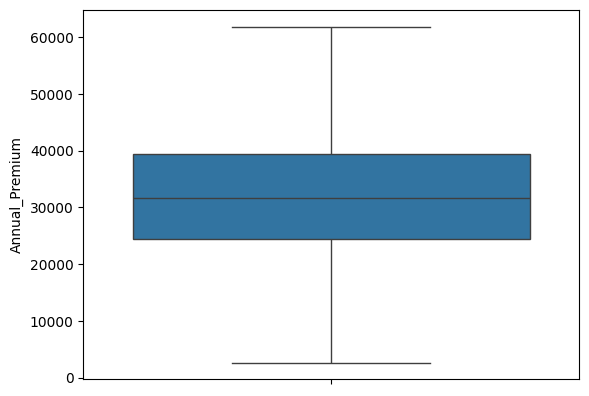

In [70]:
sns.boxplot(data['Annual_Premium'])
plt.show()

In [ ]:
X = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators = 10 , random_state=42)
classifier.fit(x_train , y_train)

ValueError: could not convert string to float: 'Middle_Age'

In [89]:
y_pred = classifier.predict(x_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [82]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm =confusion_matrix(y_test , y_pred)

<Axes: >

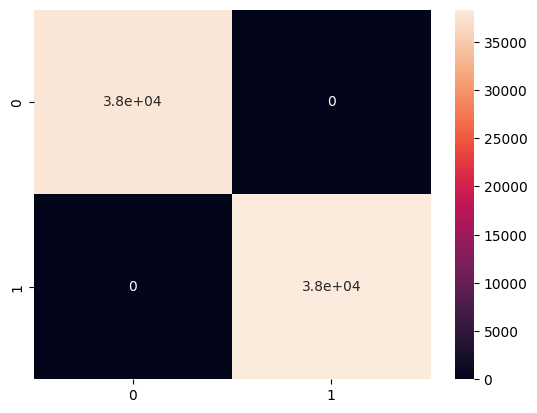

In [83]:
sns.heatmap(cm , annot=True)

Model Evaluation

In [84]:
print("Accuracy:" , accuracy_score(y_test , y_pred))

Accuracy: 1.0


In [85]:
print("Precision:" , precision_score(y_test , y_pred))

Precision: 1.0


In [86]:
print("Recall:" , recall_score(y_test , y_pred))

Recall: 1.0


In [87]:
print("F1 Score :" , f1_score(y_test , y_pred))

F1 Score : 1.0


In [67]:
print("ROC AUC Score :" , roc_auc_score(y_test , y_pred))

ROC AUC Score : 1.0
